# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

/Users/Gaby/anaconda3/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [2]:
universe = G10_FX + ASIA_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

In [4]:
spot2 = spot_ndf.copy()

spot2["USDIDR"] = spot_ndf["USDIDR"] - ndf["USDIDR"]/fwd_scale["USDIDR"]
spot2["USDINR"] = spot_ndf["USDINR"] - ndf["USDINR"]/fwd_scale["USDINR"]
spot2["USDMYR"] = spot_ndf["USDMYR"] - ndf["USDMYR"]/fwd_scale["USDMYR"]
spot2["USDTWD"] = spot_ndf["USDTWD"] - ndf["USDTWD"]/fwd_scale["USDTWD"]
spot2["USDKRW"] = spot_ndf["USDKRW"] - ndf["USDKRW"]/fwd_scale["USDKRW"]
spot2["USDPHP"] = spot_ndf["USDPHP"] - ndf["USDPHP"]/fwd_scale["USDPHP"]

spot_price_ori2 = spot2.pipe(fill_date, True).pipe(omit_trailing_na).pipe(omit_leading_na, how = "any")
spot_price_usd2 = spot_price_ori2.pipe(standardize_series, "prices")[ALL_FX]

# Data integrity

# Signal

In [5]:
sig = spot_price_usd2[universe].pipe(fill_date).rolling(window = 252*6, min_periods = 252*3).apply(lambda x: (x[-1]/x[0])-1).pipe(demean_xs).pipe(top_bottom_xs).pipe(cap_helper, 0.2).pipe(rolling_mean, 5) * -1

# Backtest Daily Rebal

In [6]:
daily_bt = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"use_cov":False})
daily_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [7]:
get_summary(daily_bt)

Returns   : 0.08514359753290134
Vol       : 0.10163323377715451
SR        : 0.8377535021624022
Max DD    : -28.23

C Returns : 0.08325346492475916
C SR      : 0.8742459128839499
C Max DD  : -25.62

Hit rate  : 0.521
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.09


In [8]:
get_returns_stats(daily_bt.asset_rtn, daily_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR,USDCNH
annualized_return,0.930309,0.771438,-0.502251,0.74239,0.478059,0.171379,0.494501,0.239138,1.01403,-0.532595,-0.684377,0.584656,1.91505,2.7713,0.546063,1.24574,-0.569854,13.3891
sharpe,0.355267,0.381964,-0.231867,0.168041,0.128539,0.05388,0.414037,0.109555,0.289364,-0.195839,-0.300241,0.247201,0.445198,0.888542,0.138013,0.329868,-0.432156,2.66171
dollar_sharpe,0.360415,0.370995,-0.242376,0.152887,0.108026,0.0407211,0.413495,0.0960269,0.283105,-0.214007,-0.303081,0.239359,0.432048,0.854698,0.118008,0.314365,-0.442204,1.73774
trade_sharpe,0.375805,0.377581,-0.349525,0.203437,0.128539,0.0695077,0.414037,0.179965,0.287955,-0.231931,-0.300241,0.24602,0.48896,0.888542,0.151395,0.357614,-0.884326,2.66171
long_sharpe,0.502295,0.630914,-0.124719,5.71131,1.09919,0.0217054,0.29012,1.03436,0.321851,-0.238988,-1.4423,1.34327,0.811513,0.419974,NaN,NaN,7.18795,2.66171
short_sharpe,0.509275,0.310617,-0.826516,0.0515242,-0.420288,1.69509,0.444064,-0.264558,1.16026,-0.554429,0.357468,0.0114535,0.362181,1.01156,0.151395,0.357614,-1.3889,NaN
sortino,0.228704,0.22127,-0.106325,0.10158,0.0866367,0.0339038,0.223194,0.0456339,0.175415,-0.106686,-0.153491,0.150937,0.261814,0.526912,0.0803271,0.19776,-0.102871,1.55357
max_drawdown,-7.10768,-4.48932,-13.4771,-12.9771,-18.6122,-14.3255,-3.52092,-7.53465,-13.4092,-10.3897,-23.5952,-8.83117,-7.72563,-5.89168,-19.0449,-7.81308,-3.54786,-0.930424
max_drawdown_start,2010-07-19,2010-05-26,2003-09-02,2009-11-16,2014-04-03,2003-09-02,2010-04-26,2014-05-08,2011-03-08,2010-06-07,2005-02-28,2006-05-10,2011-07-26,2010-05-06,2011-08-01,2014-05-16,2016-07-14,2016-12-16
max_drawdown_end,2013-04-11,2016-01-19,2015-03-13,2010-05-18,2015-06-05,2007-07-24,2010-06-07,2016-01-06,2011-08-09,2011-08-01,2010-11-09,2007-09-07,2011-09-22,2010-11-04,2013-09-03,2015-09-28,2016-11-29,2016-12-21


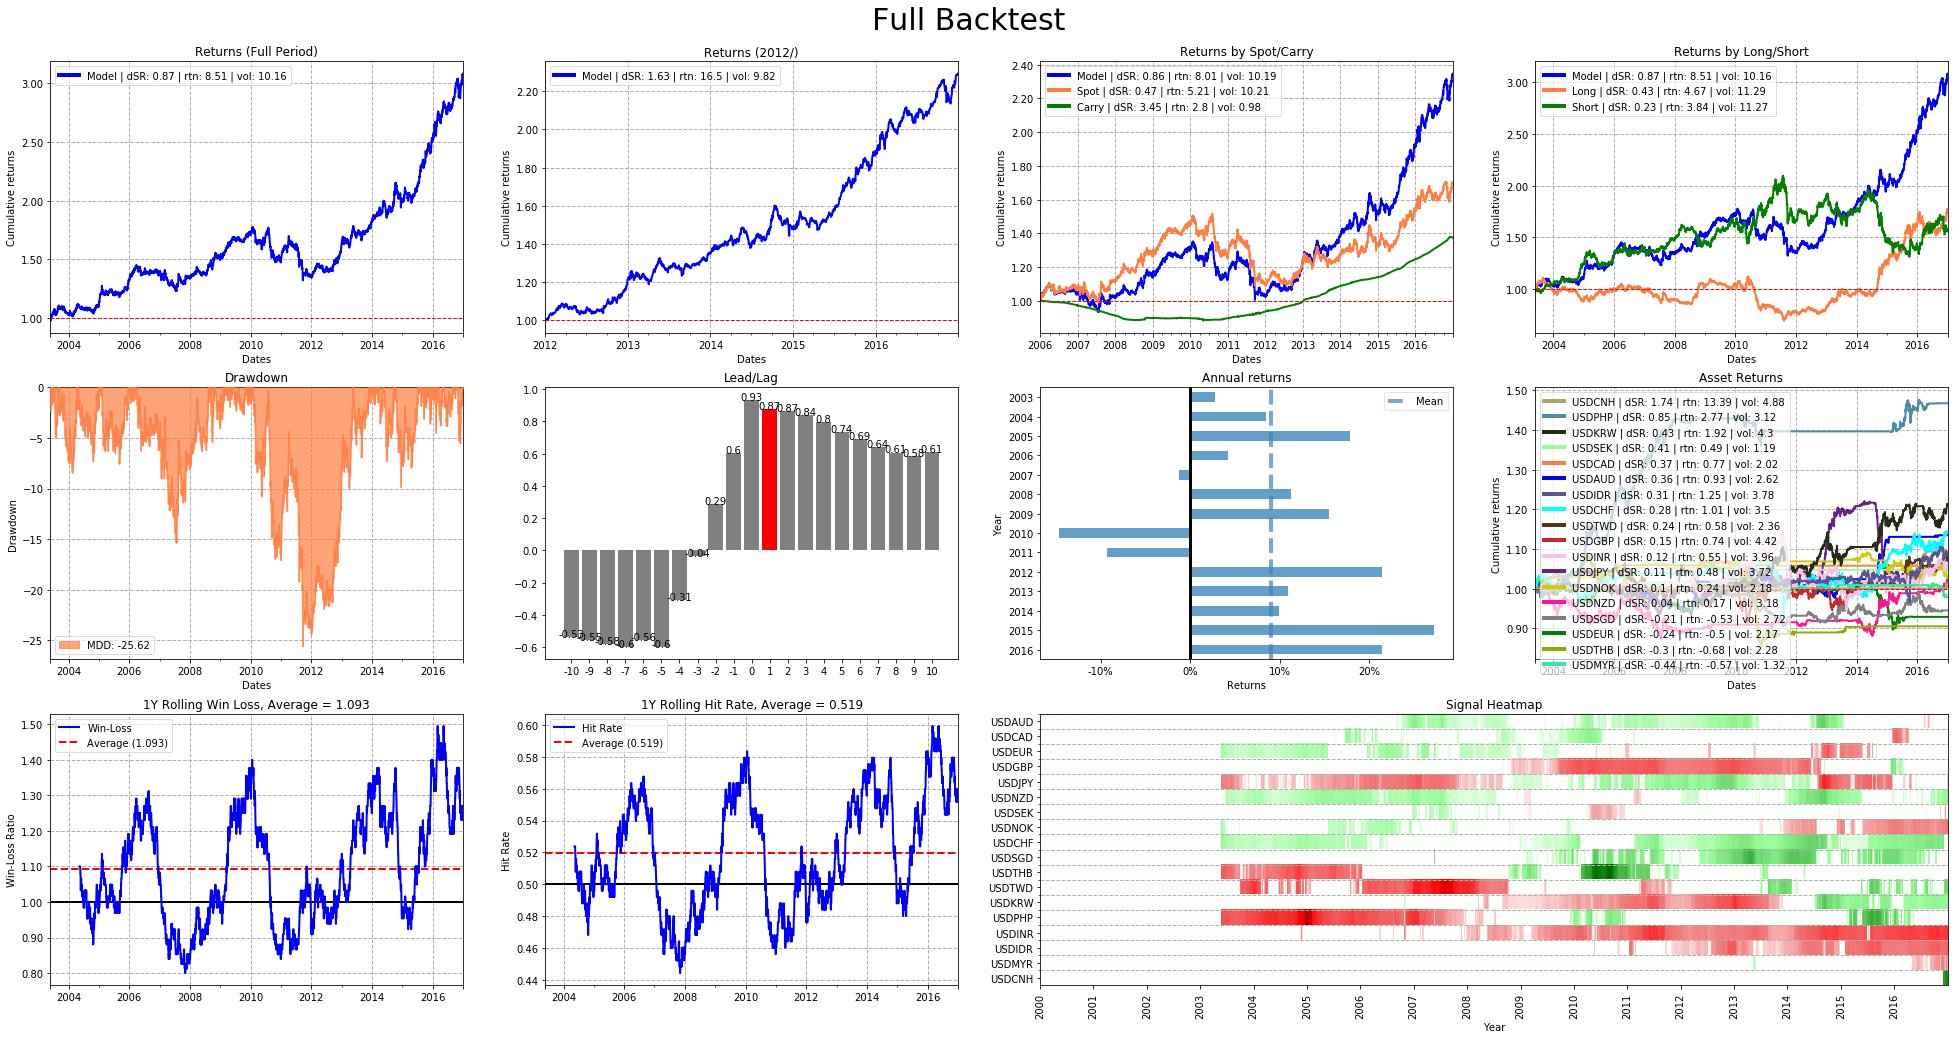

In [9]:
plot_bt(daily_bt)

# Backtest Weekly Rebal

In [10]:
weekly_bt = Backtest(signal = sig, 
             asset_returns = total_returns, 
             tcost = abs(total_returns*0), 
             settings = settings,
             settings_inject = {"rebalance_period":"friday"})
weekly_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [11]:
get_summary(weekly_bt)

Returns   : 0.07872035679279618
Vol       : 0.10244848669075121
SR        : 0.7683896496238128
Max DD    : -30.23

C Returns : 0.07623110797645666
C SR      : 0.7936581138252315
C Max DD  : -27.11

Hit rate  : 0.52
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.08


In [12]:
get_returns_stats(weekly_bt.asset_rtn, weekly_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR,USDCNH
annualized_return,0.975601,0.707638,-0.48292,0.693196,0.327143,0.175232,0.474117,0.253412,0.994542,-0.639144,-0.760807,0.431443,1.91016,2.71584,0.382048,1.34785,-0.415035,5.68147
sharpe,0.363383,0.346459,-0.223908,0.156916,0.0882015,0.0548292,0.402233,0.117122,0.282219,-0.233703,-0.331146,0.180665,0.440512,0.862435,0.096242,0.351196,-0.313622,1.07891
dollar_sharpe,0.367662,0.335233,-0.234185,0.139579,0.0683929,0.0416707,0.40196,0.103563,0.277654,-0.250391,-0.331725,0.170724,0.427557,0.81839,0.0769515,0.34326,-0.324592,1.67441
trade_sharpe,0.403996,0.360542,-0.359124,0.207712,0.0882015,0.0513278,0.402233,0.231223,0.277174,-0.300015,-0.331146,0.188286,0.484618,0.862435,0.107599,0.392344,-0.715358,1.07891
long_sharpe,0.578872,0.671112,-0.117791,6.18909,0.93455,0.00184751,0.424191,1.05671,0.318188,-0.346977,-1.58939,1.22171,0.909472,0.212693,NaN,NaN,6.01562,1.07891
short_sharpe,-0.0623262,0.238395,-0.856885,0.0535694,-0.388477,1.8098,0.406272,-0.20062,0.471015,1.22034,0.392697,-0.026996,0.32008,1.0333,0.107599,0.392344,-1.21458,NaN
sortino,0.233258,0.200413,-0.104625,0.0950175,0.0591148,0.0342446,0.216138,0.0488979,0.172979,-0.127436,-0.16897,0.109636,0.257635,0.509187,0.0557472,0.211939,-0.0744946,0.62415
max_drawdown,-8.34553,-5.09617,-12.2461,-12.7501,-18.4834,-14.5821,-3.48326,-6.99893,-13.6274,-10.4043,-23.9511,-9.05192,-7.72907,-5.48279,-19.1384,-7.82908,-3.26914,-0.926983
max_drawdown_start,2010-07-05,2008-11-20,2003-09-02,2009-11-16,2014-04-03,2003-09-02,2007-08-16,2014-05-08,2011-03-08,2009-03-05,2009-03-02,2006-05-10,2011-07-26,2010-05-06,2011-08-01,2014-05-16,2016-07-14,2016-12-16
max_drawdown_end,2013-04-11,2016-01-19,2015-03-13,2010-05-18,2015-06-05,2007-07-24,2010-06-07,2016-01-06,2011-08-09,2011-08-01,2010-11-09,2007-09-07,2011-09-22,2010-11-04,2013-09-03,2015-09-28,2016-12-15,2016-12-21


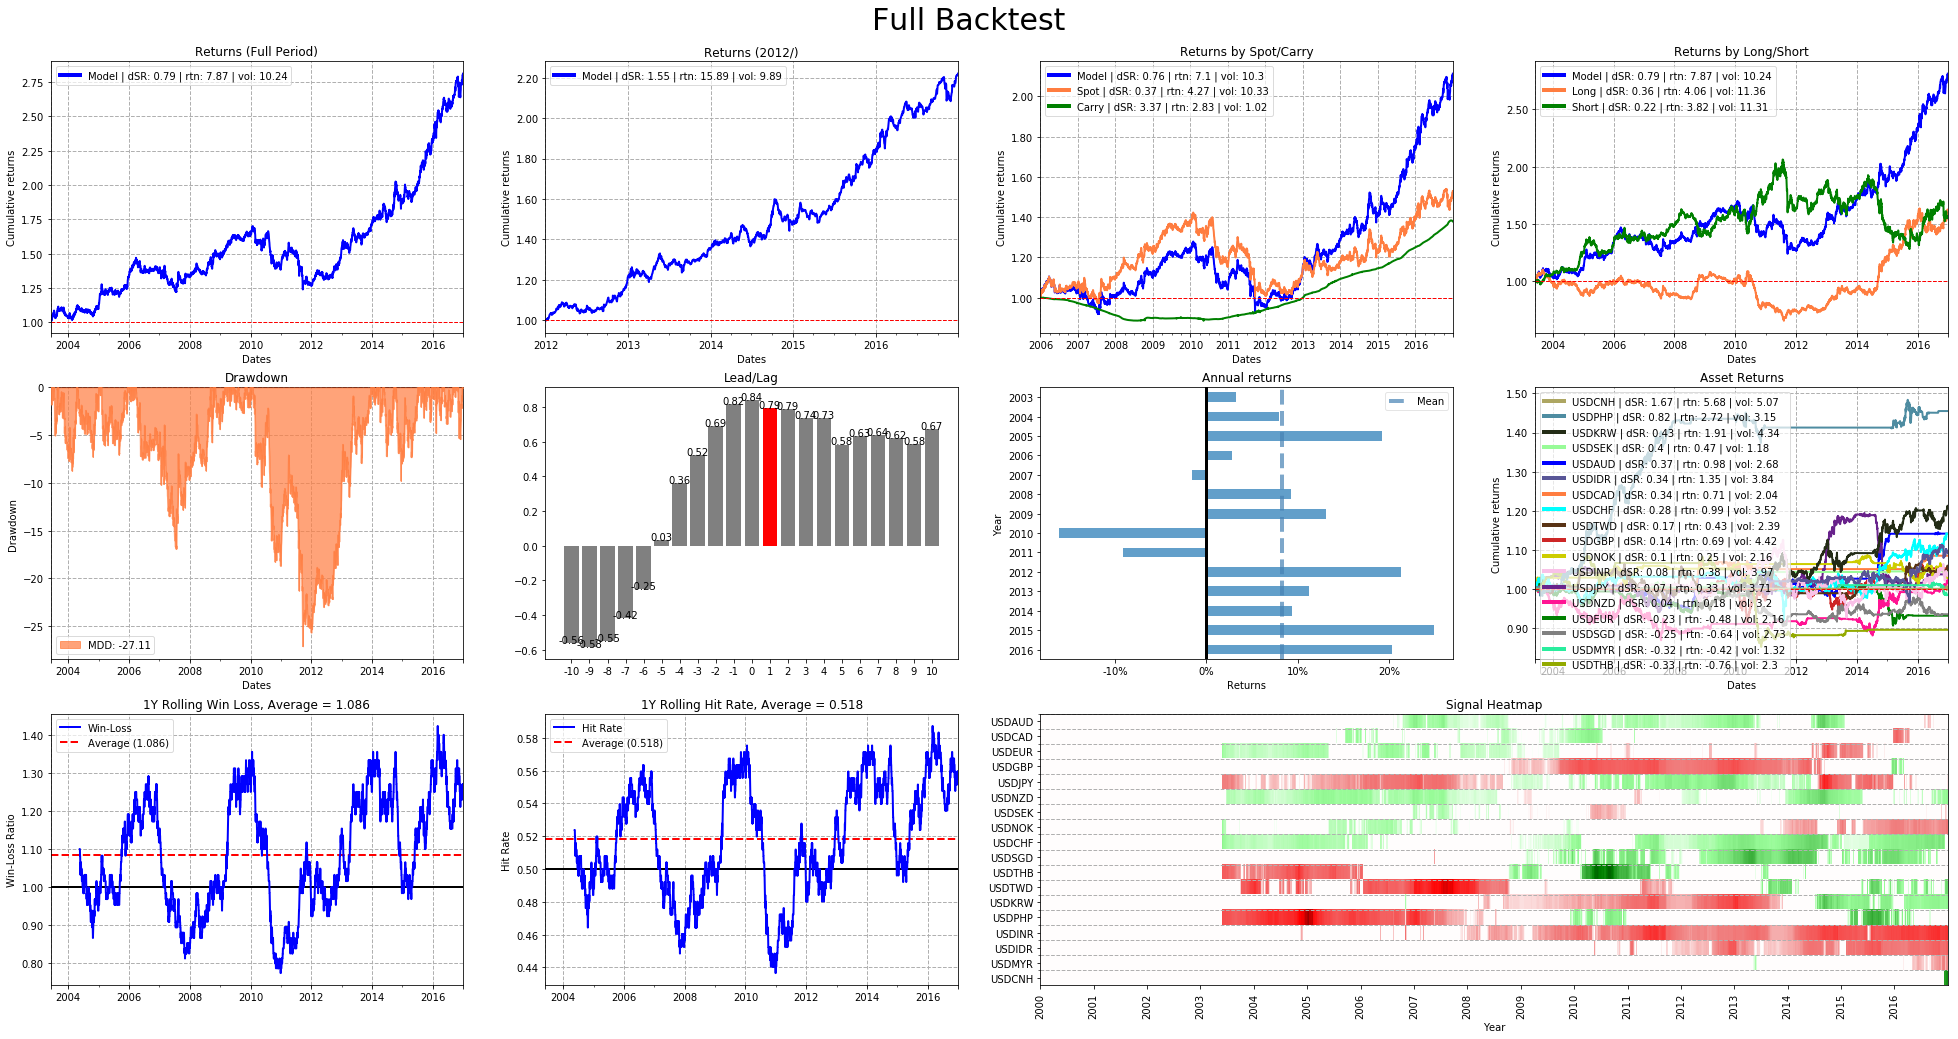

In [13]:
plot_bt(weekly_bt)

# Daily vs Weekly 

<AxesSubplot:title={'center':'Daily vs Weekly Rebal'}, xlabel='Dates', ylabel='Cumulative returns'>

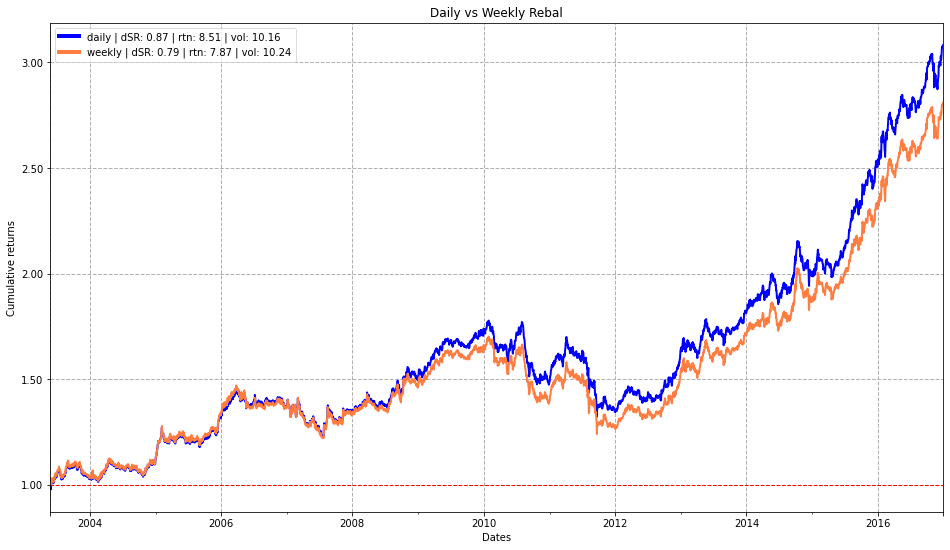

In [89]:
gen_plot_rtn(pd.concat([daily_bt.model_rtn.rename("daily"), weekly_bt.model_rtn.rename("weekly")], axis=1), main = "Daily vs Weekly Rebal")

In [91]:
# pickle.dump(daily_bt, open("../BT/value_sgneer_all_daily.p", "wb"))
# daily_bt = pickle.load(open("../BT/value_sgneer_all_daily.p", "rb"))

# pickle.dump(weekly_bt, open("../BT/value_sgneer_all_weekly.p", "wb"))
# weekly_bt = pickle.load(open("../BT/value_sgneer_all_weekly.p", "rb"))

# Regime Plot

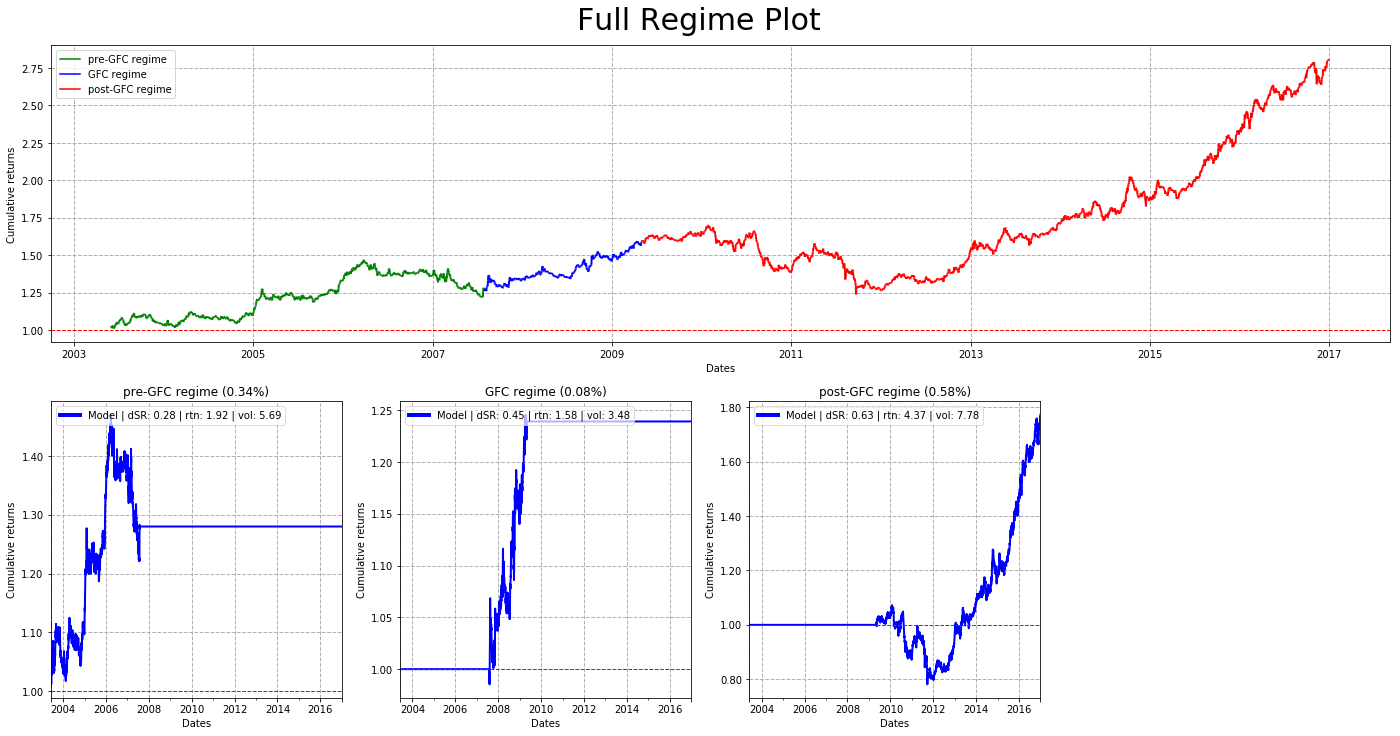

In [14]:
full_regime_plot(weekly_bt, gfc_regime)

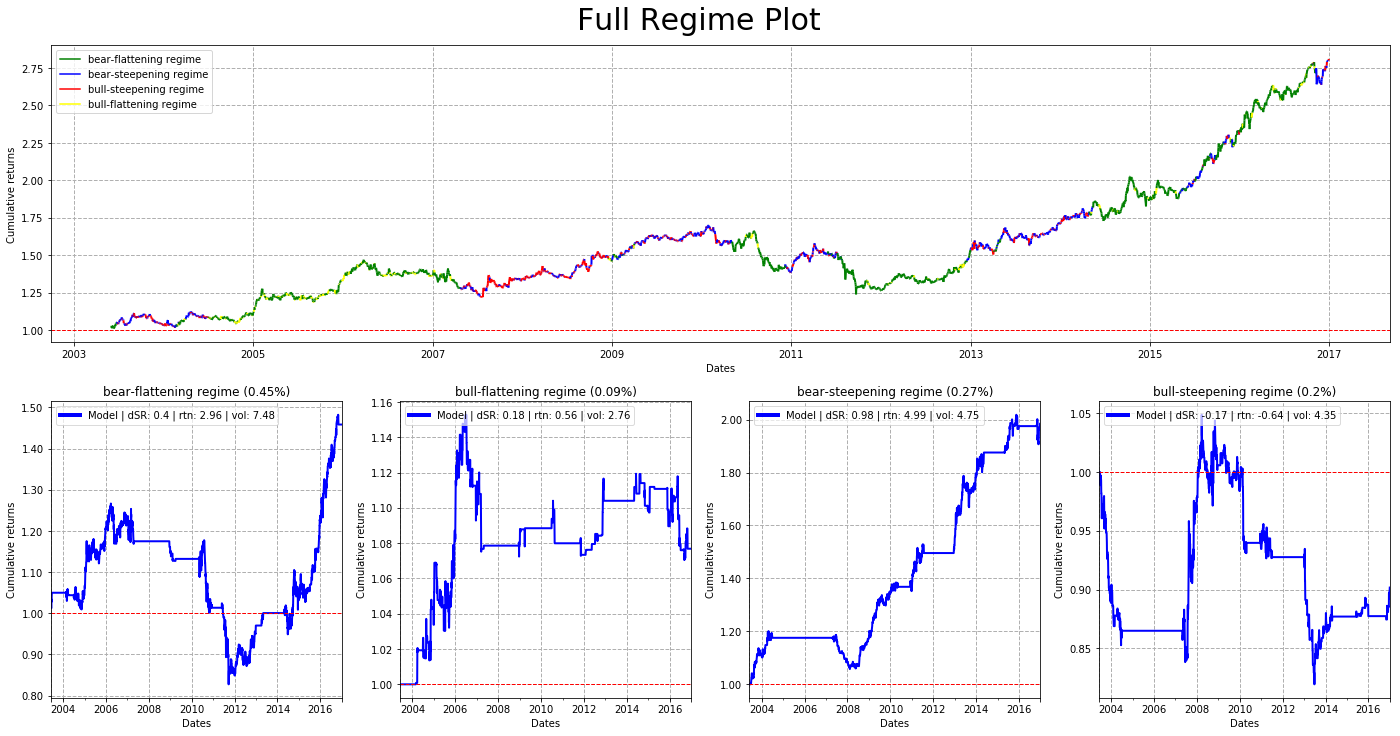

In [15]:
full_regime_plot(weekly_bt, rates_regime)

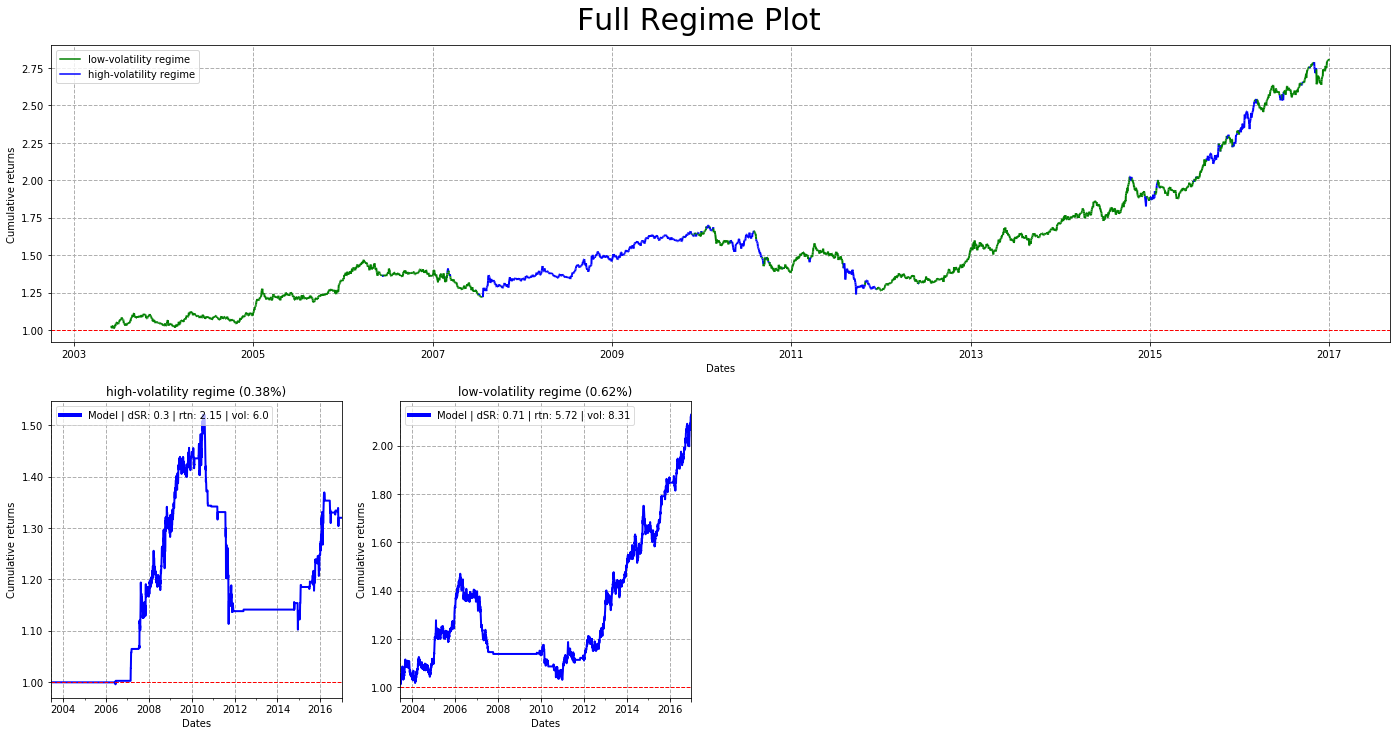

In [16]:
full_regime_plot(weekly_bt, vol_regime)

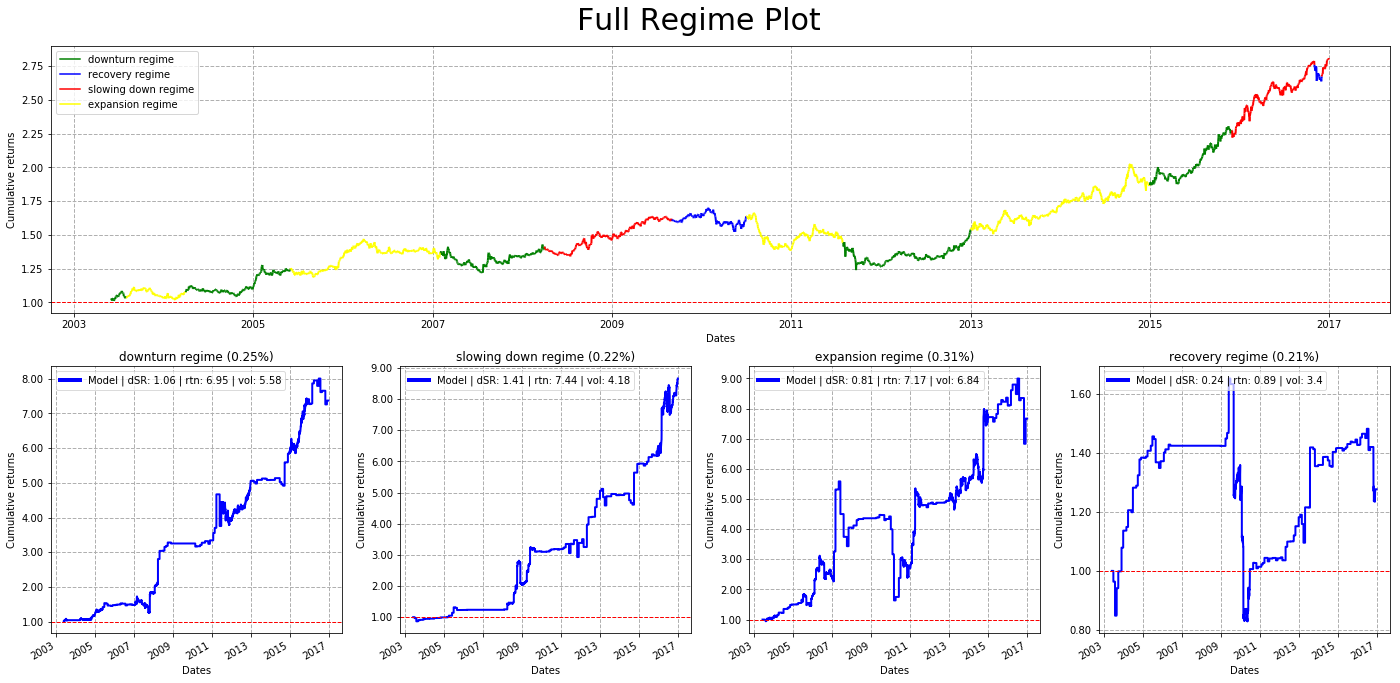

In [17]:
full_regime_plot(weekly_bt, cycle_regime)

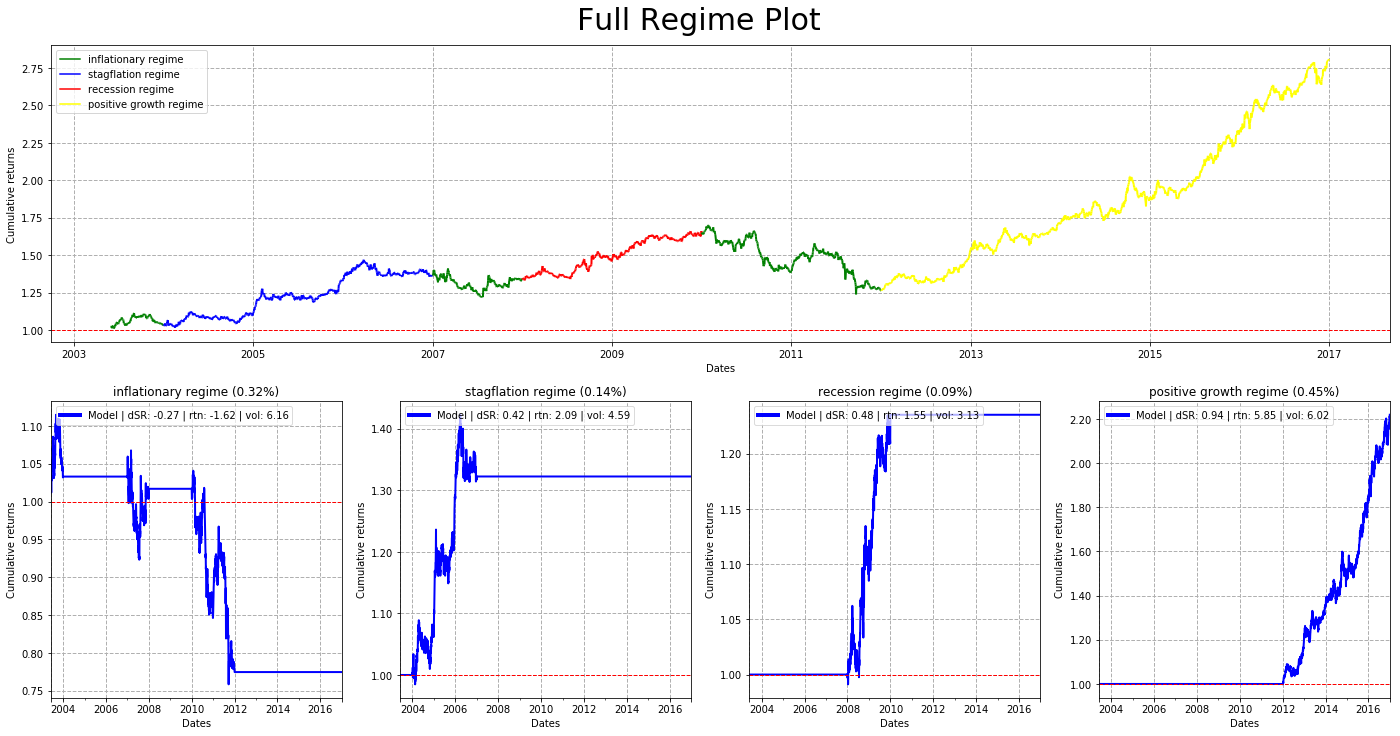

In [18]:
full_regime_plot(weekly_bt, macro_regime)

# Sensitivity Analysis

In [19]:
# pf.plot_monthly_returns_dist(bt_obj.model_rtn)